In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielalastra/HR_Analytics/main/company_x_dataset_HR.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


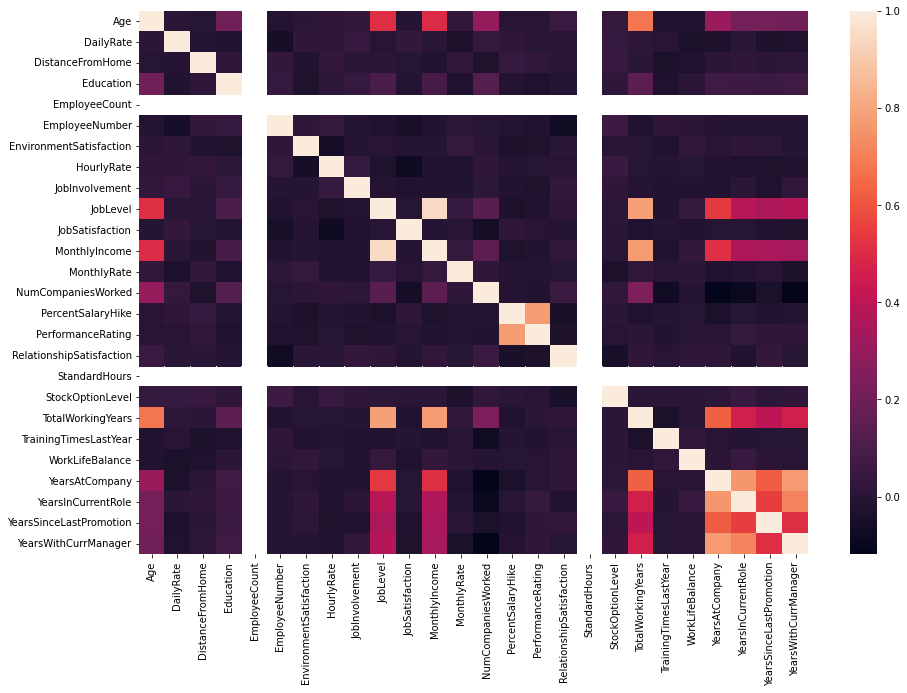

In [30]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr())

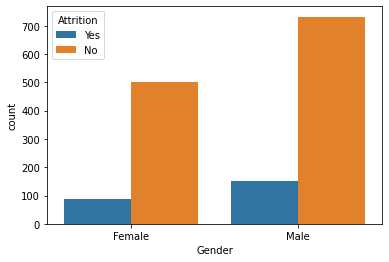

In [19]:
sns.countplot(x='Gender', data=df, hue='Attrition')

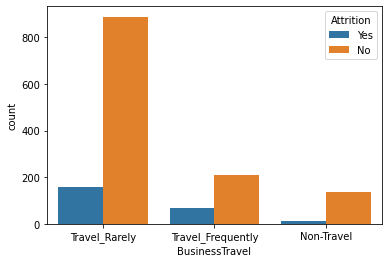

In [20]:
sns.countplot(x='BusinessTravel', data=df, hue='Attrition')

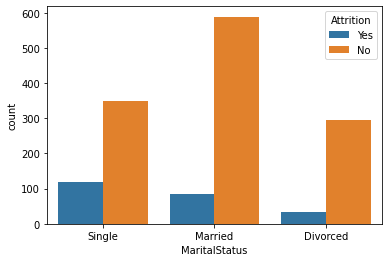

In [21]:
sns.countplot(x='MaritalStatus', data=df, hue='Attrition')

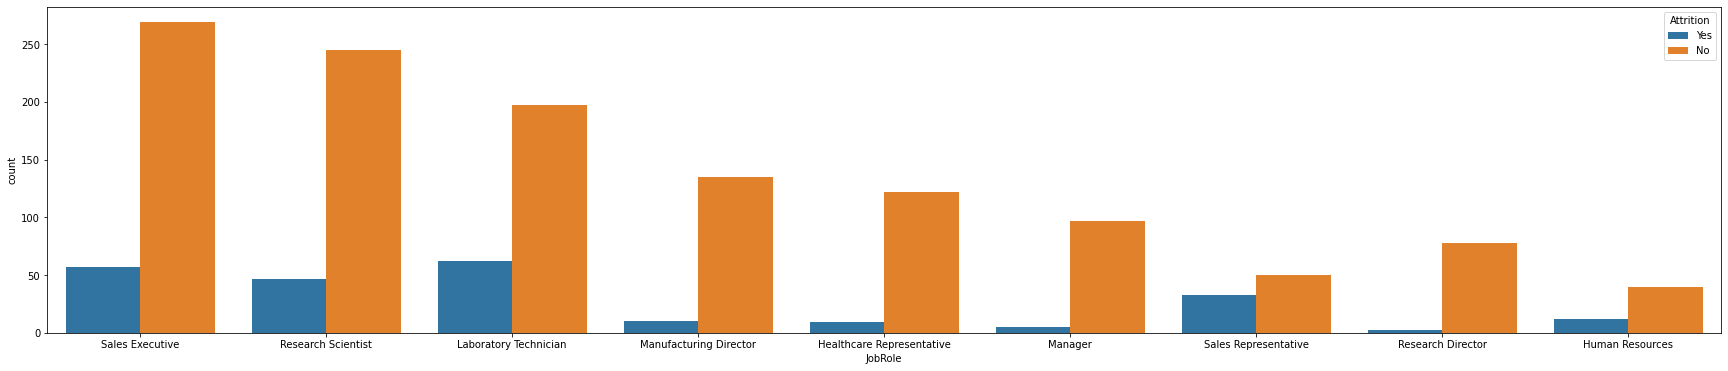

In [24]:
plt.figure(figsize=[30,6])
sns.countplot(x='JobRole', data=df, hue='Attrition')

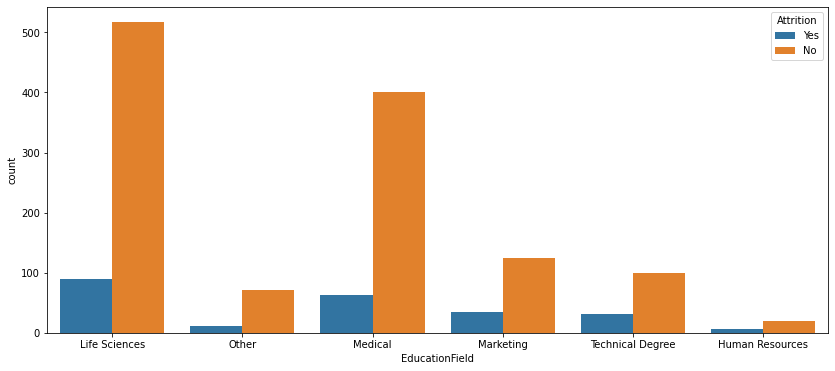

In [26]:
plt.figure(figsize=[14,6])
sns.countplot(x='EducationField', data=df, hue='Attrition')

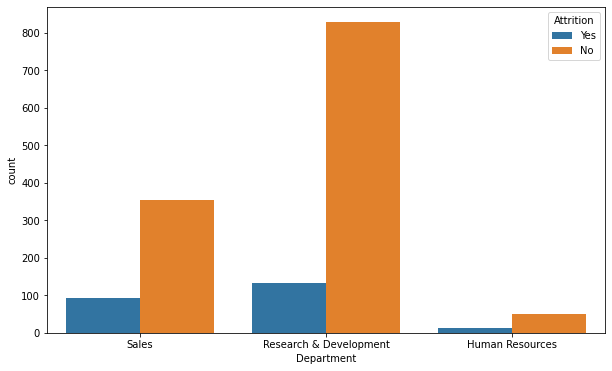

In [27]:
plt.figure(figsize=[10,6])
sns.countplot(x='Department', data=df, hue='Attrition')

In [32]:
df['Attrition'] = df['Attrition'].replace({'Yes' : 1,
                                           'No' : 0})

In [50]:
df2=df.copy()

In [51]:
df2=df2.drop(columns=['Over18','OverTime'])

<h5>Transforming to Numerical</h5>

In [64]:
df3 = pd.get_dummies(df2,columns=['EducationField', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus'])

In [65]:
df3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,94,3,2,4,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,80,0,8,0,0.000000,6,4,0,5,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,61,2,2,2,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,80,1,10,3,0.666667,10,7,1,7,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,1,3,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,80,0,7,3,0.666667,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,56,3,1,3,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,80,0,8,3,0.666667,8,7,3,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,40,3,1,2,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,80,1,6,3,0.666667,2,2,2,2,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [60]:
from sklearn.preprocessing import MinMaxScaler

scale_vars = ['MonthlyIncome','MonthlyRate','NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance',   ]
scaler = MinMaxScaler()

df3[scale_vars] = scaler.fit_transform(df3[scale_vars])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,80,0,8,0,0.000000,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,80,1,10,3,0.666667,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,80,0,7,3,0.666667,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,80,0,8,3,0.666667,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,80,1,6,3,0.666667,2,2,2,2


<h5 align='center'>Decision Tree</h5>

In [66]:
x = df3.drop('Attrition', axis=1).values #input features attributes
y = df3['Attrition'].values #target selector
print('x shape is: {}'.format(np.shape(x))) 
print('y shape is: {}'.format(np.shape(y)))

x shape is: (1470, 52)
y shape is: (1470,)


In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9,
                                                    test_size=0.1, random_state=0)


In [68]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=4, random_state=1) #maxdepth is the tree levels
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [70]:
import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz


dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=df3.drop('Attrition', axis=1).columns,    
    class_names=df3['Attrition'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.render('decision_tree.svg', format='svg', directory='output').replace('\\', '/')

#Class 0 == Attrition NO == Blue
#Class 1 == Attrition YES == Levels till orange

'output/decision_tree.svg.svg'

In [49]:
for i, column in enumerate(df3.drop('Attrition', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column],
                       'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try: #the others values
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except: #the first value
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Age:, 0.132
Importance of feature DailyRate:, 0.032
Importance of feature DistanceFromHome:, 0.000
Importance of feature Education:, 0.000
Importance of feature EmployeeCount:, 0.000
Importance of feature EmployeeNumber:, 0.042
Importance of feature EnvironmentSatisfaction:, 0.000
Importance of feature HourlyRate:, 0.088
Importance of feature JobInvolvement:, 0.052
Importance of feature JobLevel:, 0.000
Importance of feature JobSatisfaction:, 0.000
Importance of feature MonthlyIncome:, 0.072
Importance of feature MonthlyRate:, 0.000
Importance of feature NumCompaniesWorked:, 0.000
Importance of feature PercentSalaryHike:, 0.000
Importance of feature PerformanceRating:, 0.000
Importance of feature RelationshipSatisfaction:, 0.000
Importance of feature StandardHours:, 0.000
Importance of feature StockOptionLevel:, 0.149
Importance of feature TotalWorkingYears:, 0.265
Importance of feature TrainingTimesLastYear:, 0.000
Importance of feature WorkLifeBalance:, 0.000
Im

,index,Variable,Feature Importance Score
0,19,TotalWorkingYears,0.264717
1,18,StockOptionLevel,0.148993
2,0,Age,0.132330
3,7,HourlyRate,0.087863
4,11,MonthlyIncome,0.071742
5,22,YearsAtCompany,0.059449
6,33,BusinessTravel_Travel_Frequently,0.056693
7,47,JobRole_Sales Executive,0.053072
8,8,JobInvolvement,0.051562
9,5,EmployeeNumber,0.041940


<h4 align='center'>Model Accuracy</h4>

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score


In [71]:
print("Training Accuracy is: ", dt.score(x_train, y_train)) #evaluated the model on the same dataset that it was trained for
print("\n\nTesting Accuracy is: ", dt.score(x_test, y_test)) #evaluate the model for new datas.

Training Accuracy is:  0.8639455782312925


Testing Accuracy is:  0.7959183673469388


<h5>Confusion Matrix</h5>

In [72]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, 
                    vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
y_prediction = dt.predict(x_train)


In [76]:
confusion_matrix(y_train, y_prediction)


array([[1091,   21],
       [ 159,   52]])

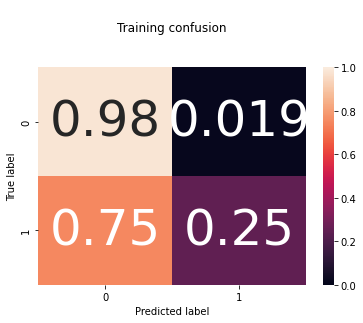

In [77]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_,
                      title='\nTraining confusion\n\n')

#98% good on predict Attrition = No, and 25% of certain about Attrition = Yes.